<a href="https://colab.research.google.com/github/gakutakimoto/gaku-lala-apps/blob/main/M_Tracer_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 必要なライブラリをインポート
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 📌 データを読み込む（Colabにアップロード済みのファイルを使う）
file_path = "/content/sample_data/swing_detail_cluster_results.csv"
data = pd.read_csv(file_path, dtype=str, low_memory=False)

# 📌 数値カラムを適切な型に変換
num_cols = [
    'impactClubPath', 'impactHandFirst', 'downSwingShaftRotationMin',
    'impactAttackAngle', 'topFaceAngleToHorizontal', 'impactGripSpeed',
    'addressHandFirst', 'addressLieAngle', 'impactLieAngle', 'profileHeight', 'impactHeadSpeed'
]
data[num_cols] = data[num_cols].astype(float)

# 📌 使用するカラム & 重み設定
feature_columns = {
    'impactClubPath': 2.0,  # 最重要（×2.0）
    'impactHandFirst': 1.5,  # 重要（×1.5）
    'downSwingShaftRotationMin': 1.5,  # 重要（×1.5）
    'impactAttackAngle': 1.0,  # 補助（×1.0）
    'topFaceAngleToHorizontal': 1.0,  # 補助（×1.0）
    'impactGripSpeed': 1.0,  # 補助（×1.0）
    'addressHandFirst': 1.0,  # 補助（×1.0）
    'addressLieAngle': 1.0,  # 補助（×1.0）
    'impactLieAngle': 1.0   # 補助（×1.0）
}

# 📌 必要なカラムだけ抽出
data_selected = data[list(feature_columns.keys())]

# 📌 欠損値を処理（平均値で補完）
data_selected = data_selected.fillna(data_selected.mean())

# 📌 データの標準化（スケール統一）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# 📌 重み付けを適用
weights = np.array(list(feature_columns.values()))
data_scaled_weighted = data_scaled * weights

# 📌 クラスタリング実施（クラスタ数 = 5）
kmeans = KMeans(n_clusters=5, random_state=42, n_init=1)  # n_initを1にして計算負荷を軽減
data_selected['cluster'] = kmeans.fit_predict(data_scaled_weighted)

# 📌 元データにクラスタ情報を追加
data_final = data.merge(data_selected[['cluster']], left_index=True, right_index=True)

# 📌 クラスタ名（英語）
cluster_names = {
    0: "Outside-in Control",
    1: "Straight Power Hitter",
    2: "Inside-out Fade",
    3: "Inside-out Draw Hitter",
    4: "Straight Athlete"
}

# 📌 身長カテゴリ（170cm 以上 / 未満を 1 / 0 に変換）
data_final['height_category'] = np.where(data_final['profileHeight'] >= 170, "1", "0")

# 📌 ヘッドスピードカテゴリを作成（Slow / Mid / Fast → 0, 1, 2 に変換）
bins = [0, 33, 37, 100]
labels = ['0', '1', '2']  # SlowHS → 0, MidHS → 1, FastHS → 2
data_final['hs_category'] = pd.cut(
    data_final['impactHeadSpeed'], bins=bins, labels=labels, include_lowest=True
).astype(str)  # 🛠 Categorical → 文字列に変換

# 📌 クラスタ名（スイングタイプ）
data_final['swing_type'] = data_final['cluster'].map(cluster_names)

# 📌 クラスタIDの修正（数値化したヘッドスピードを使用）
data_final['cluster_id'] = (
    data_final['cluster'].astype(str) + '-' +
    data_final['height_category'] + '-' +
    data_final['hs_category']
)

# 📌 最終スインググループ名
data_final['final_swing_group'] = (
    data_final['swing_type'].astype(str) + '-' +
    data_final['height_category'].astype(str) + '-' +
    data_final['hs_category']
)

# ✅ 確認用の出力
display(data_final[['swing_type', 'height_category', 'hs_category', 'cluster_id', 'final_swing_group']].head(20))

# 📌 クラスタリング結果をCSVで保存（UTF-8対策）
csv_output_path = "/content/swing_cluster_results.csv"
data_final.to_csv(csv_output_path, index=False, encoding="utf-8-sig")
print(f"✅ クラスタリング結果をCSVに保存しました: {csv_output_path}")

# 📌 クラスタリング結果をExcelで保存（UTF-8対応）
excel_output_path = "/content/swing_cluster_results.xlsx"
data_final.to_excel(excel_output_path, index=False)
print(f"✅ クラスタリング結果をExcelに保存しました: {excel_output_path}")


,swing_type,height_category,hs_category,cluster_id,final_swing_group
0,Inside-out Fade,1,0,2-1-0,Inside-out Fade-1-0
1,Straight Athlete,1,0,4-1-0,Straight Athlete-1-0
2,Straight Power Hitter,0,2,1-0-2,Straight Power Hitter-0-2
3,Inside-out Fade,0,1,2-0-1,Inside-out Fade-0-1
4,Inside-out Fade,1,0,2-1-0,Inside-out Fade-1-0
5,Straight Power Hitter,0,2,1-0-2,Straight Power Hitter-0-2
6,Inside-out Fade,1,0,2-1-0,Inside-out Fade-1-0
7,Straight Power Hitter,0,2,1-0-2,Straight Power Hitter-0-2
8,Inside-out Fade,1,0,2-1-0,Inside-out Fade-1-0
9,Straight Power Hitter,0,2,1-0-2,Straight Power Hitter-0-2


✅ クラスタリング結果をCSVに保存しました: /content/swing_cluster_results.csv
✅ クラスタリング結果をExcelに保存しました: /content/swing_cluster_results.xlsx


CSVファイルをアップロードしてください


Saving #swing_detail.csv to #swing_detail.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12508 (\N{KATAKANA LETTER BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure

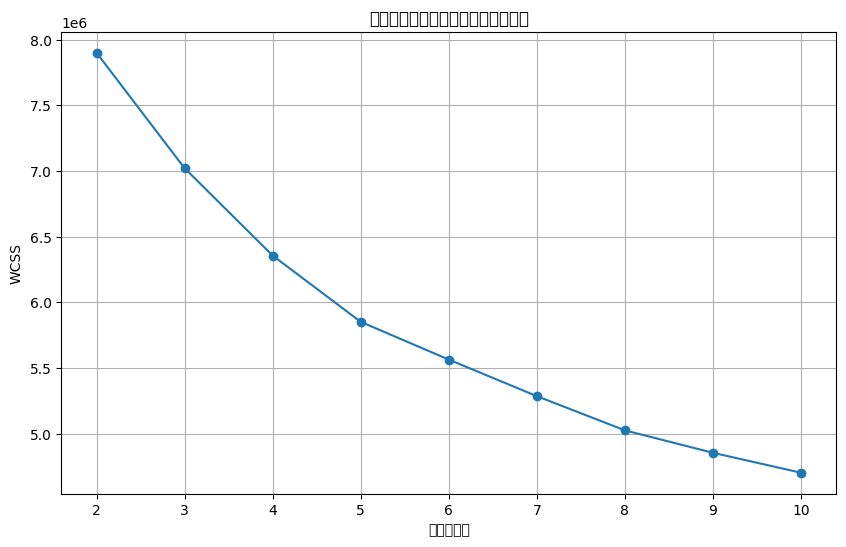

各クラスタの中心値:
   impactClubPath  impactHandFirst  downSwingShaftRotationMin  \
0       -8.535384         3.462093               -1222.857246   
1        5.389221       -10.762777               -1016.445083   
2        3.996535       -10.134144               -1888.058115   
3        6.857081       -12.456007               -1130.091338   
4       22.309364       -30.054306               -1284.465591   

   impactAttackAngle  topFaceAngleToHorizontal  impactGripSpeed  \
0           0.972080                  8.161411         5.814605   
1          -1.735953                -28.210252         5.259404   
2          -0.692266                 -2.436934         6.002076   
3           2.079460                  2.951000         6.259418   
4          -2.727568                 -9.049246         6.236089   

   addressHandFirst  addressLieAngle  impactLieAngle                   クラスタ名  
0         -0.518583        45.775446       46.671689      Outside-in Control  
1        -11.527610        54.301001 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

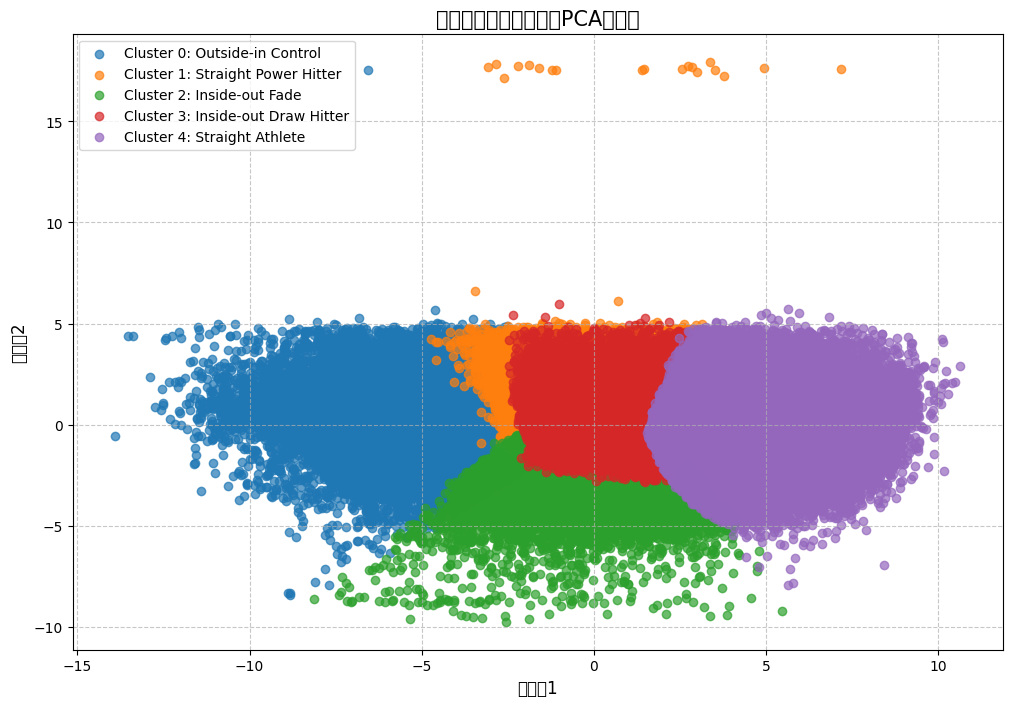


サブカテゴリ別の分布:
                swing_type height_category hs_category club_type  count
55   Straight Power Hitter               1           0         I  59148
10  Inside-out Draw Hitter               1           2         D  58106
49   Straight Power Hitter               0           0         I  40730
8   Inside-out Draw Hitter               1           1         D  32577
21         Inside-out Fade               1           1         I  30711
34      Outside-in Control               1           2         D  29355
22         Inside-out Fade               1           2         D  28392
4   Inside-out Draw Hitter               0           2         D  28171
46        Straight Athlete               1           2         D  25618
28      Outside-in Control               0           2         D  22051
57   Straight Power Hitter               1           1         I  21480
23         Inside-out Fade               1           2         I  19666
25      Outside-in Control               0         

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ クラスタリング結果をExcelに保存しました: swing_cluster_results.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ 新しいスイングを分類する関数も定義しました。


In [ ]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# アップロードボタンの表示
print("CSVファイルをアップロードしてください")
uploaded = files.upload()

# アップロードされたファイル名を取得
file_name = list(uploaded.keys())[0]

# データを読み込む
data = pd.read_csv(file_name, dtype=str, low_memory=False)

# 数値カラムを適切な型に変換
num_cols = [
    'impactClubPath', 'impactHandFirst', 'downSwingShaftRotationMin',
    'impactAttackAngle', 'topFaceAngleToHorizontal', 'impactGripSpeed',
    'addressHandFirst', 'addressLieAngle', 'impactLieAngle', 'profileHeight',
    'impactHeadSpeed', 'clubLength', 'estimateCarry', 'impactFaceAngle'
]
data[num_cols] = data[num_cols].astype(float)

# 使用するカラム & 重み設定
feature_columns = {
    'impactClubPath': 2.0,  # 最重要（×2.0）
    'impactHandFirst': 1.5,  # 重要（×1.5）
    'downSwingShaftRotationMin': 1.5,  # 重要（×1.5）
    'impactAttackAngle': 1.0,  # 補助（×1.0）
    'topFaceAngleToHorizontal': 1.0,  # 補助（×1.0）
    'impactGripSpeed': 1.0,  # 補助（×1.0）
    'addressHandFirst': 1.0,  # 補助（×1.0）
    'addressLieAngle': 1.0,  # 補助（×1.0）
    'impactLieAngle': 1.0   # 補助（×1.0）
}

# 必要なカラムだけ抽出
data_selected = data[list(feature_columns.keys())]

# 欠損値を処理（平均値で補完）
data_selected = data_selected.fillna(data_selected.mean())

# データの標準化（スケール統一）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# 重み付けを適用
weights = np.array(list(feature_columns.values()))
data_scaled_weighted = data_scaled * weights

# 最適なクラスタ数を探索（オプション）
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_scaled_weighted)
    wcss.append(kmeans.inertia_)

# エルボー法のグラフを描画
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('エルボー法でのクラスタ数の最適化')
plt.xlabel('クラスタ数')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# クラスタリング実施（クラスタ数 = 5）
n_clusters = 5  # 必要に応じて調整
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled_weighted)

# 元のデータフレームにクラスタを追加
data_selected['cluster'] = clusters
data_final = data.merge(data_selected[['cluster']], left_index=True, right_index=True)

# クラスタ名（英語）
cluster_names = {
    0: "Outside-in Control",
    1: "Straight Power Hitter",
    2: "Inside-out Fade",
    3: "Inside-out Draw Hitter",
    4: "Straight Athlete"
}

# クラスタ名のマッピング
data_final['swing_type'] = data_final['cluster'].map(cluster_names)

# 身長カテゴリ（170cm 以上 / 未満を 1 / 0 に変換）
data_final['height_category'] = np.where(data_final['profileHeight'] >= 170, "1", "0")

# ヘッドスピードカテゴリを作成
bins = [0, 32, 37, float('inf')]
labels = ['0', '1', '2']  # SlowHS → 0, MidHS → 1, FastHS → 2
data_final['hs_category'] = pd.cut(
    data_final['impactHeadSpeed'], bins=bins, labels=labels, include_lowest=True
).astype(str)

# クラブ種類カテゴリを追加
data_final['club_type'] = np.where(data_final['clubLength'] >= 1, "D", "I")

# クラスタIDの作成（クラスタ-身長-ヘッドスピード-クラブ種類）
data_final['cluster_id'] = (
    data_final['cluster'].astype(str) + '-' +
    data_final['height_category'] + '-' +
    data_final['hs_category'] + '-' +
    data_final['club_type']
)

# 最終スインググループ名
data_final['final_swing_group'] = (
    data_final['swing_type'].astype(str) + '-' +
    data_final['height_category'].astype(str) + '-' +
    data_final['hs_category'] + '-' +
    data_final['club_type']
)

# 各クラスタの特徴を分析
cluster_centers_scaled = kmeans.cluster_centers_ / weights
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(cluster_centers_scaled),
    columns=feature_columns.keys()
)
cluster_centers['クラスタ名'] = [cluster_names[i] for i in range(n_clusters)]

# クラスタ中心の表示
print("各クラスタの中心値:")
print(cluster_centers)

# 各クラスタの件数とパフォーマンス指標
cluster_stats = data_final.groupby('cluster').agg({
    'estimateCarry': ['mean', 'std', 'min', 'max'],
    'impactFaceAngle': ['mean', 'std', 'min', 'max'],
    'cluster_id': 'count'
}).reset_index()
cluster_stats.columns = ['cluster', 'avg_carry', 'std_carry', 'min_carry', 'max_carry',
                         'avg_face_angle', 'std_face_angle', 'min_face_angle', 'max_face_angle', 'count']
cluster_stats['cluster_name'] = cluster_stats['cluster'].map(cluster_names)

print("\n各クラスタの統計:")
print(cluster_stats[['cluster', 'cluster_name', 'count', 'avg_carry', 'avg_face_angle']])

# 確認用にデータの一部を表示
print("\nデータサンプル:")
print(data_final[['swing_type', 'height_category', 'hs_category', 'club_type', 'cluster_id', 'final_swing_group']].head(10))

# クラスタリング結果の可視化（二次元へ射影）
from sklearn.decomposition import PCA

# PCAで2次元に削減
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled_weighted)

# 可視化
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.scatter(
        data_pca[clusters == i, 0],
        data_pca[clusters == i, 1],
        label=f"Cluster {i}: {cluster_names[i]}",
        alpha=0.7
    )

plt.title('クラスタリング結果のPCA可視化', fontsize=15)
plt.xlabel('主成分1', fontsize=12)
plt.ylabel('主成分2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# サブカテゴリ別の分布を分析
subcat_dist = data_final.groupby(['swing_type', 'height_category', 'hs_category', 'club_type']).size().reset_index(name='count')
print("\nサブカテゴリ別の分布:")
print(subcat_dist.sort_values('count', ascending=False).head(20))

# クラスタリング結果をCSVで保存
csv_output_path = "swing_cluster_results.csv"
data_final.to_csv(csv_output_path, index=False, encoding="utf-8-sig")
print(f"\n✅ クラスタリング結果をCSVに保存しました: {csv_output_path}")

# 結果をダウンロード
files.download(csv_output_path)

# クラスタリング結果をExcelで保存（オプション）
try:
    excel_output_path = "swing_cluster_results.xlsx"
    data_final.to_excel(excel_output_path, index=False)
    print(f"✅ クラスタリング結果をExcelに保存しました: {excel_output_path}")
    files.download(excel_output_path)
except Exception as e:
    print(f"Excelファイルの保存中にエラーが発生しました: {e}")

# 新しいスイングデータを分類する関数（将来の利用のため）
def classify_new_swing(new_swing_data):
    """
    新しいスイングデータをどのクラスタに分類するかを判定する関数

    Parameters:
    new_swing_data (dict): 特徴量のキーと値を持つ辞書

    Returns:
    dict: 分類結果（クラスタID、スイングタイプ、クラスタとの距離など）
    """
    # 必要な特徴量を抽出
    features = {k: new_swing_data.get(k, 0) for k in feature_columns.keys()}
    new_data = pd.DataFrame([features])

    # 身長とヘッドスピードを取得
    height = new_swing_data.get('profileHeight', 170)
    headspeed = new_swing_data.get('impactHeadSpeed', 35)
    club_length = new_swing_data.get('clubLength', 1.0)

    # カテゴリを判定
    height_cat = "1" if height >= 170 else "0"

    if headspeed <= 32:
        hs_cat = "0"
    elif headspeed <= 37:
        hs_cat = "1"
    else:
        hs_cat = "2"

    club_type = "D" if club_length >= 1 else "I"

    # データの標準化と重み付け
    new_data_scaled = scaler.transform(new_data)
    new_data_weighted = new_data_scaled * weights

    # クラスタ予測
    cluster = kmeans.predict(new_data_weighted)[0]

    # クラスタとの距離を計算
    distances = kmeans.transform(new_data_weighted)[0]
    closest_distance = distances[cluster]

    # 結果を返す
    return {
        'cluster': int(cluster),
        'swing_type': cluster_names[cluster],
        'height_category': height_cat,
        'hs_category': hs_cat,
        'club_type': club_type,
        'cluster_id': f"{cluster}-{height_cat}-{hs_cat}-{club_type}",
        'final_swing_group': f"{cluster_names[cluster]}-{height_cat}-{hs_cat}-{club_type}",
        'distance_to_cluster': closest_distance,
        'cluster_center': cluster_centers.iloc[cluster].to_dict()
    }

print("\n✅ 新しいスイングを分類する関数も定義しました。")

データフレームのカラム名:
['profileHeight', 'clubLength', 'addressHandFirst', 'addressLieAngle', 'impactClubPath', 'impactHandFirst', 'impactAttackAngle', 'impactHeadSpeed', 'impactLieAngle', 'impactRelativeFaceAngle', 'impactShaftRotation', 'impactFaceAngle', 'impactGripSpeed', 'impactLoftAngle', 'maxHeadSpeed', 'maxGripSpeed', 'topFaceAngleToHorizontal', 'halfwaydownFaceAngleToVertical', 'downSwingShaftRotationMax', 'downSwingShaftRotationMin', 'halfwaybackFaceAngleToVertical', 'estimateCarry', 'cluster', 'swing_type', 'height_category', 'hs_category', 'club_type', 'cluster_id', 'final_swing_group']

クラスタごとの成功率:
   cluster            cluster_name  is_success_pct   count
2        2         Inside-out Fade       15.922341  137216
3        3  Inside-out Draw Hitter       12.978333  167718
0        0      Outside-in Control       10.015256  154035
1        1   Straight Power Hitter        9.000052  155188
4        4        Straight Athlete        0.047216  118603

クラスタごとの個別条件達成率:
             cluste

<ipython-input-11-6ed0bd6027ac>:136: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:136: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:136: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:136: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:136: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:136: UserWarning: Glyph 21151 (\N{CJK UNIFIED IDEOGRAPH-529F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:136: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  p

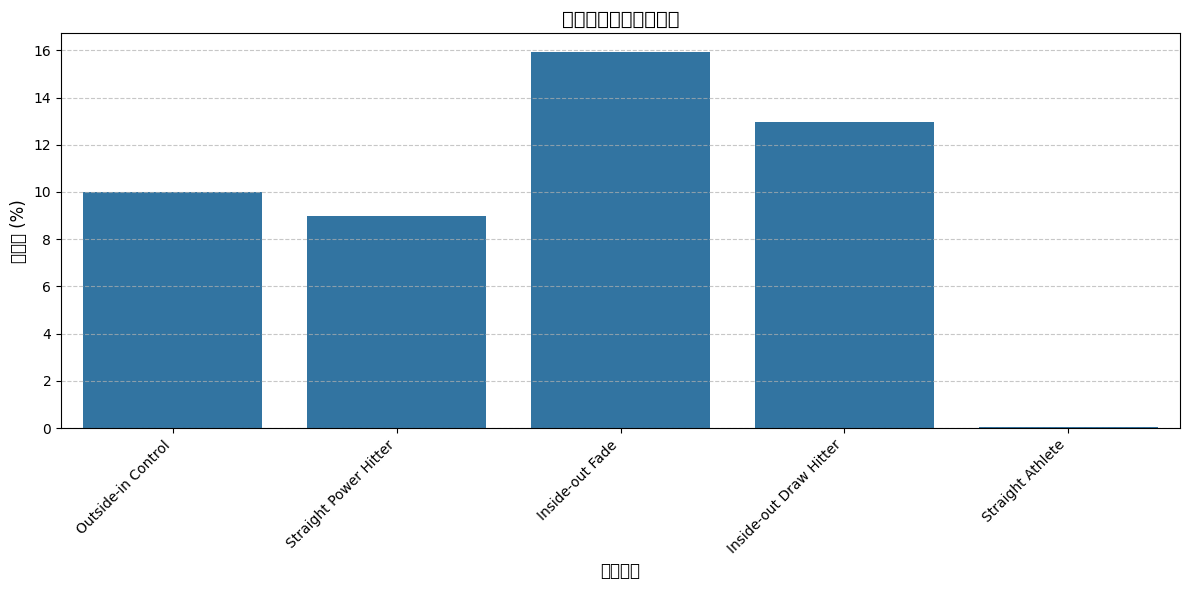

<ipython-input-11-6ed0bd6027ac>:148: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:148: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:148: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:148: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:148: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:148: UserWarning: Glyph 21151 (\N{CJK UNIFIED IDEOGRAPH-529F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:148: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  p

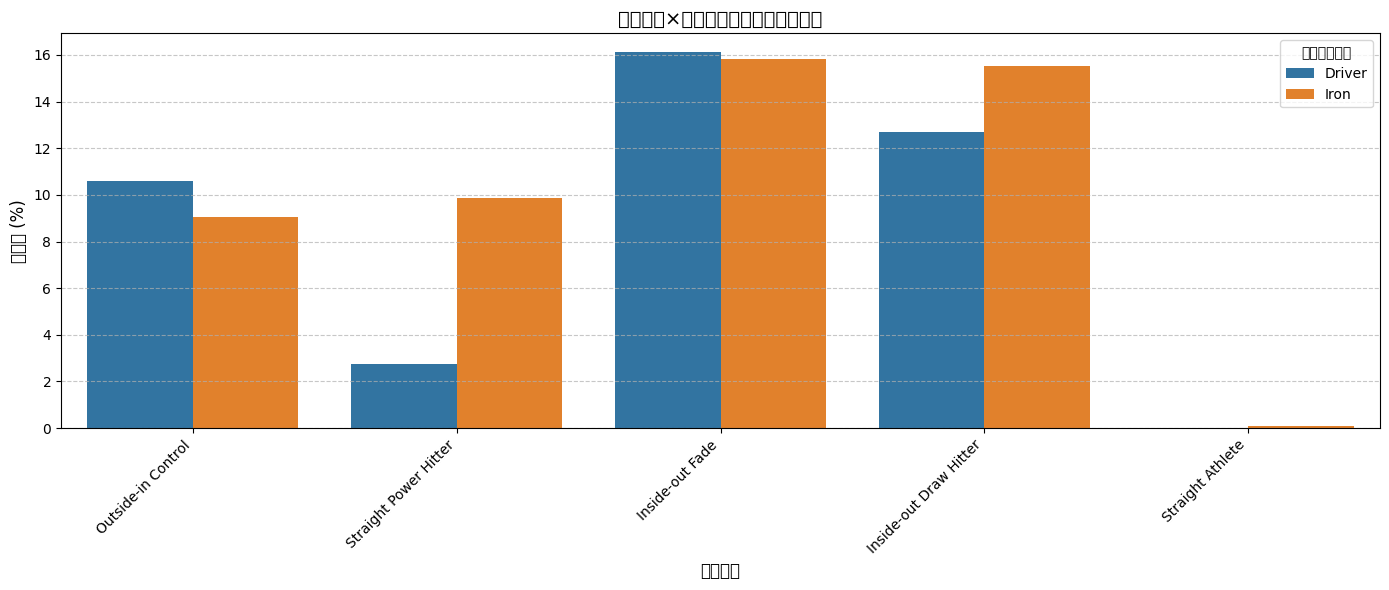

<ipython-input-11-6ed0bd6027ac>:183: UserWarning: Glyph 39131 (\N{CJK UNIFIED IDEOGRAPH-98DB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:183: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:183: UserWarning: Glyph 38626 (\N{CJK UNIFIED IDEOGRAPH-96E2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:183: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:183: UserWarning: Glyph 12455 (\N{KATAKANA LETTER SMALL E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:183: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-6ed0bd6027ac>:183: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from

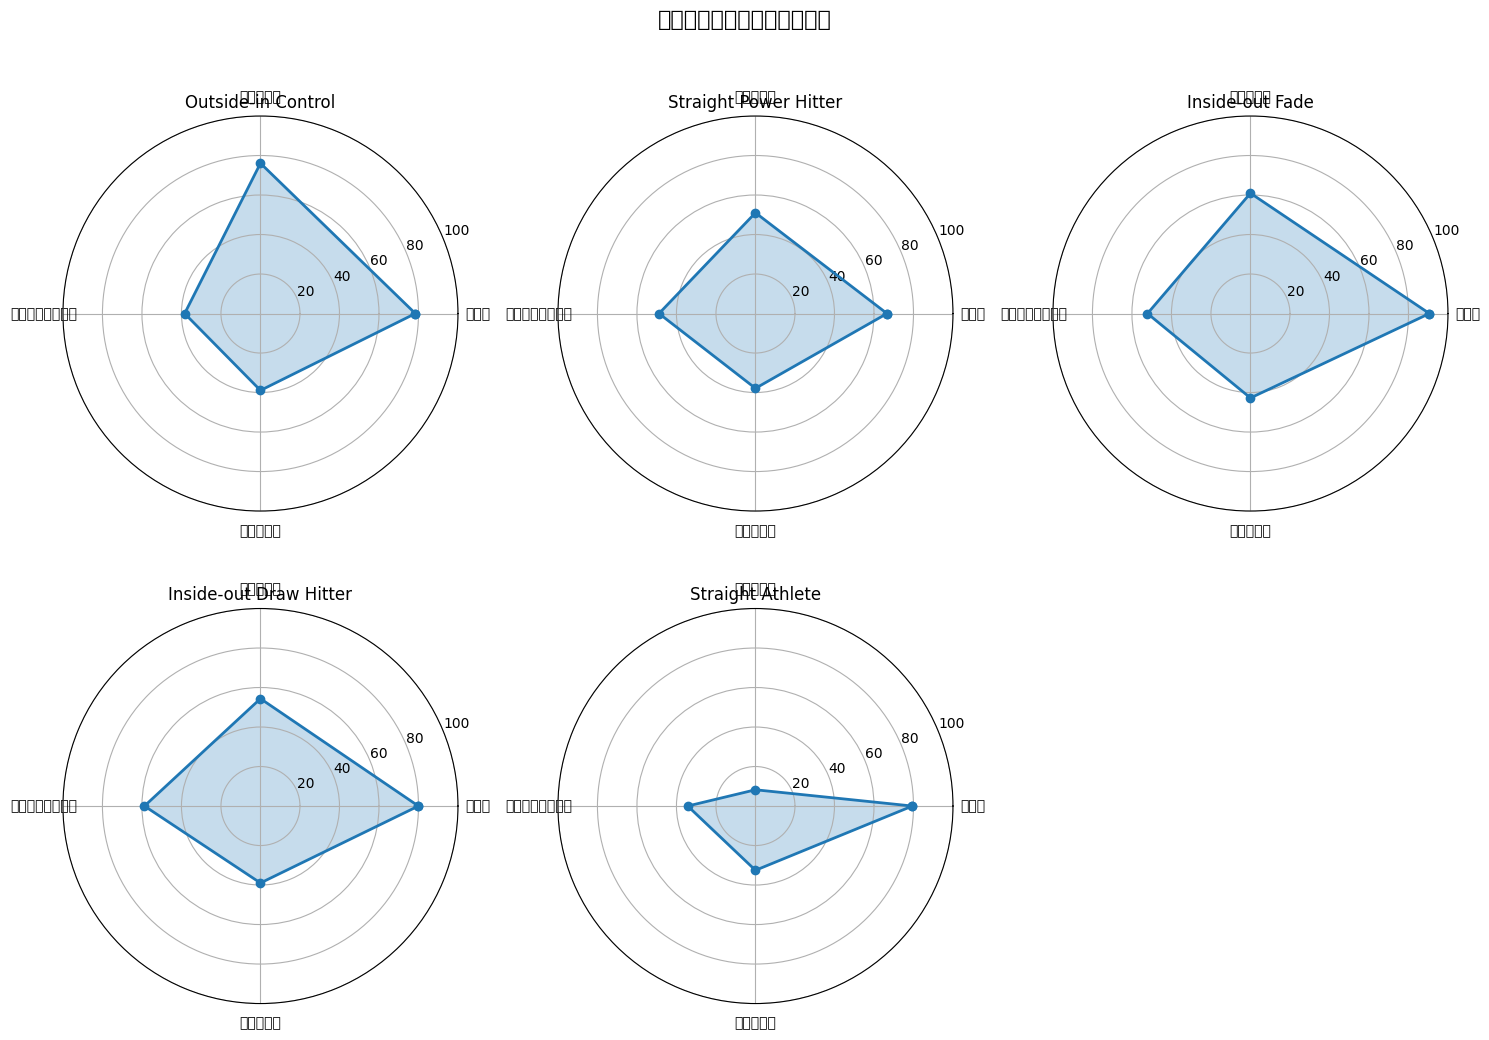


クラブタイプ別・クラスタ別の詳細分析:

Driverの成功率:
             cluster_name  is_success_pct
4         Inside-out Fade       16.122738
6  Inside-out Draw Hitter       12.695932
0      Outside-in Control       10.607336
2   Straight Power Hitter        2.765398
8        Straight Athlete        0.001497

Driverの個別条件達成率:
             cluster_name  distance_ok_pct  face_angle_ok_pct  \
0      Outside-in Control        72.689871          78.937899   
2   Straight Power Hitter        24.936906          44.509478   
4         Inside-out Fade        84.150424          61.650475   
6  Inside-out Draw Hitter        78.520486          54.146442   
8        Straight Athlete        73.626620           8.244768   

   face_to_path_ok_pct  attack_angle_ok_pct  
0            41.412909            37.459753  
2            45.132363            27.900983  
4            51.681078            40.041899  
6            59.128264            38.897019  
8            34.634614            28.865671  

Ironの成功率:
             cluste

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21151 (\N{CJK UNIFIED IDEOGRAPH-529F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **

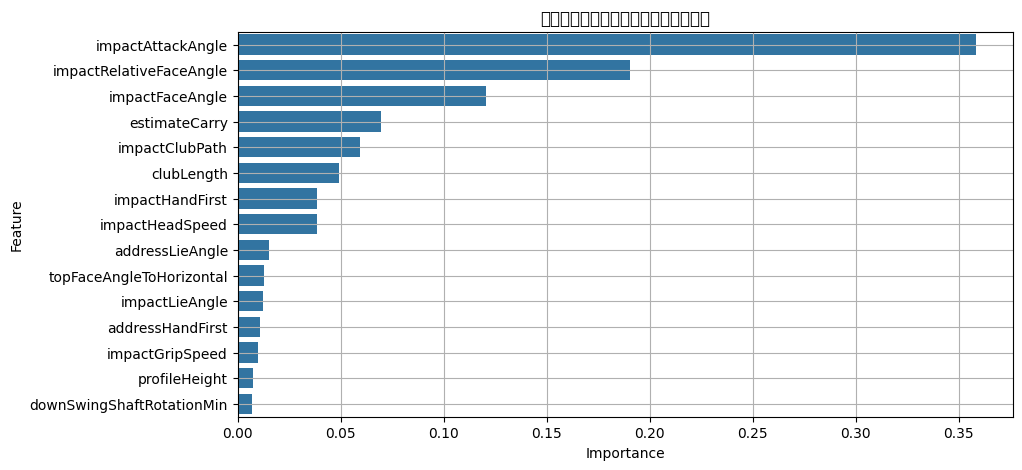

In [11]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Colabの既存ファイルを読み込む
file_path = "/content/swing_cluster_results.csv"
data = pd.read_csv(file_path, low_memory=False)

# データフレームのカラム名を確認（デバッグ用）
print("データフレームのカラム名:")
print(data.columns.tolist())

# 数値カラムを適切な型に変換
num_cols = [
    'impactClubPath', 'impactHandFirst', 'downSwingShaftRotationMin',
    'impactAttackAngle', 'topFaceAngleToHorizontal', 'impactGripSpeed',
    'addressHandFirst', 'addressLieAngle', 'impactLieAngle', 'profileHeight',
    'impactHeadSpeed', 'clubLength', 'estimateCarry', 'impactFaceAngle',
    'impactRelativeFaceAngle'
]

for col in num_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# 成功スイングの定義関数
def define_success(row):
    # クラブタイプの判定
    is_driver = row['clubLength'] >= 1

    # 飛距離条件
    if is_driver:
        # ドライバー条件
        distance_ok = 180 <= row['estimateCarry'] <= 270
    else:
        # アイアン条件
        distance_ok = row['estimateCarry'] >= 100 and row['estimateCarry'] <= 180

    # 共通の角度条件
    face_angle_ok = abs(row['impactFaceAngle']) <= 8.0
    face_to_path_ok = -5.0 <= row['impactRelativeFaceAngle'] <= 5.0

    # クラブ別のアタック角条件
    if is_driver:
        # ドライバーはアッパーブロー
        attack_angle_ok = 0.0 <= row['impactAttackAngle'] <= 5.0
    else:
        # アイアンはダウンブロー
        attack_angle_ok = -7.0 <= row['impactAttackAngle'] <= -1.0

    # すべての条件を満たせば成功
    return distance_ok and face_angle_ok and face_to_path_ok and attack_angle_ok

# NaN値を含む行を除外して成功判定
data_clean = data.dropna(subset=num_cols)
data_clean['is_success'] = data_clean.apply(define_success, axis=1)

# 成功条件の個別達成率も算出
data_clean['club_type'] = np.where(data_clean['clubLength'] >= 1, 'Driver', 'Iron')
data_clean['distance_ok'] = data_clean.apply(lambda row:
    (180 <= row['estimateCarry'] <= 270) if row['club_type'] == 'Driver'
    else (100 <= row['estimateCarry'] <= 180), axis=1)
data_clean['face_angle_ok'] = data_clean['impactFaceAngle'].abs() <= 8.0
data_clean['face_to_path_ok'] = (-5.0 <= data_clean['impactRelativeFaceAngle']) & (data_clean['impactRelativeFaceAngle'] <= 5.0)
data_clean['attack_angle_ok'] = data_clean.apply(lambda row:
    (0.0 <= row['impactAttackAngle'] <= 5.0) if row['club_type'] == 'Driver'
    else (-7.0 <= row['impactAttackAngle'] <= -1.0), axis=1)

# クラスタ名のマッピング
cluster_names = {
    0: "Outside-in Control",
    1: "Straight Power Hitter",
    2: "Inside-out Fade",
    3: "Inside-out Draw Hitter",
    4: "Straight Athlete"
}

# データにクラスタ名を追加
data_clean['cluster_name'] = data_clean['cluster'].map(cluster_names)

# クラスタごとの成功率を計算
cluster_success = data_clean.groupby('cluster').agg({
    'is_success': 'mean',
    'distance_ok': 'mean',
    'face_angle_ok': 'mean',
    'face_to_path_ok': 'mean',
    'attack_angle_ok': 'mean'
}).reset_index()

# 各クラスタのサンプル数を計算
cluster_counts = data_clean.groupby('cluster').size().reset_index(name='count')

# 成功率の計算結果とカウントを結合
cluster_success = pd.merge(cluster_success, cluster_counts, on='cluster')

# 成功率をパーセント表示に変換
for col in ['is_success', 'distance_ok', 'face_angle_ok', 'face_to_path_ok', 'attack_angle_ok']:
    cluster_success[f'{col}_pct'] = cluster_success[col] * 100

# クラスタ名を追加
cluster_success['cluster_name'] = cluster_success['cluster'].map(cluster_names)

# クラスタごとにクラブタイプ別の成功率を計算
club_type_counts = data_clean.groupby(['cluster', 'club_type']).size().reset_index(name='count')
club_type_success = data_clean.groupby(['cluster', 'club_type'])['is_success'].mean().reset_index()
club_type_success['success_rate_pct'] = club_type_success['is_success'] * 100

# 結果を結合
club_cluster_success = pd.merge(club_type_success, club_type_counts, on=['cluster', 'club_type'])

# クラスタ名を追加
club_cluster_success['cluster_name'] = club_cluster_success['cluster'].map(cluster_names)

# 結果の表示
print("\nクラスタごとの成功率:")
print(cluster_success[['cluster', 'cluster_name', 'is_success_pct', 'count']].sort_values('is_success_pct', ascending=False))

print("\nクラスタごとの個別条件達成率:")
print(cluster_success[['cluster_name', 'distance_ok_pct', 'face_angle_ok_pct', 'face_to_path_ok_pct', 'attack_angle_ok_pct']])

# クラスタ×クラブタイプごとの成功率（クラスタ名でソート）
print("\nクラスタ×クラブタイプごとの成功率:")
result_df = club_cluster_success[['cluster_name', 'club_type', 'success_rate_pct', 'count']]
print(result_df.sort_values(by=['cluster_name', 'club_type']))

# グラフ化 - クラスタごとの成功率
plt.figure(figsize=(12, 6))
sns.barplot(x='cluster_name', y='is_success_pct', data=cluster_success)
plt.title('クラスタごとの成功率', fontsize=14)
plt.xlabel('クラスタ', fontsize=12)
plt.ylabel('成功率 (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# グラフ化 - クラスタ×クラブタイプごとの成功率
plt.figure(figsize=(14, 6))
sns.barplot(x='cluster_name', y='success_rate_pct', hue='club_type', data=club_cluster_success)
plt.title('クラスタ×クラブタイプごとの成功率', fontsize=14)
plt.xlabel('クラスタ', fontsize=12)
plt.ylabel('成功率 (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='クラブタイプ')
plt.tight_layout()
plt.show()

# 各クラスタの条件別達成率の比較（レーダーチャート）
plt.figure(figsize=(15, 10))

categories = ['飛距離', 'フェース角', 'フェーストゥパス', 'アタック角']
for i, row in cluster_success.iterrows():
    values = [
        row['distance_ok_pct'],
        row['face_angle_ok_pct'],
        row['face_to_path_ok_pct'],
        row['attack_angle_ok_pct']
    ]

    # 閉じたポリゴンにするために最初の値を最後にも追加
    values.append(values[0])

    # 角度の計算
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles.append(angles[0])

    # サブプロット位置の計算
    ax = plt.subplot(2, 3, i+1, polar=True)

    # レーダーチャートをプロット
    ax.plot(angles, values, 'o-', linewidth=2, label=row['cluster_name'])
    ax.fill(angles, values, alpha=0.25)

    # ラベルを設定
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    ax.set_ylim(0, 100)
    ax.set_title(row['cluster_name'], fontsize=12)
    ax.grid(True)

plt.tight_layout()
plt.suptitle('クラスタごとの条件別達成率', fontsize=16, y=1.05)
plt.show()

# クラブタイプ別の詳細分析
club_type_analysis = data_clean.groupby(['cluster', 'club_type']).agg({
    'distance_ok': 'mean',
    'face_angle_ok': 'mean',
    'face_to_path_ok': 'mean',
    'attack_angle_ok': 'mean',
    'is_success': 'mean'
}).reset_index()

# パーセント表示に変換
for col in ['distance_ok', 'face_angle_ok', 'face_to_path_ok', 'attack_angle_ok', 'is_success']:
    club_type_analysis[f'{col}_pct'] = club_type_analysis[col] * 100

# クラスタ名を追加
club_type_analysis['cluster_name'] = club_type_analysis['cluster'].map(cluster_names)

# 結果表示
print("\nクラブタイプ別・クラスタ別の詳細分析:")
for club in ['Driver', 'Iron']:
    club_data = club_type_analysis[club_type_analysis['club_type'] == club]
    print(f"\n{club}の成功率:")
    print(club_data[['cluster_name', 'is_success_pct']].sort_values('is_success_pct', ascending=False))

    print(f"\n{club}の個別条件達成率:")
    print(club_data[['cluster_name', 'distance_ok_pct', 'face_angle_ok_pct', 'face_to_path_ok_pct', 'attack_angle_ok_pct']])

# ドライバーとアイアンの成功率の差を分析
pivot_success = pd.pivot_table(
    club_type_analysis,
    values='is_success_pct',
    index='cluster_name',
    columns='club_type'
)

# 差分を計算
if 'Driver' in pivot_success.columns and 'Iron' in pivot_success.columns:
    pivot_success['diff'] = pivot_success['Driver'] - pivot_success['Iron']
    print("\nドライバーとアイアンの成功率の差 (Driver - Iron):")
    print(pivot_success.sort_values('diff', ascending=False))


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 特徴量とターゲット
X = data_clean[num_cols]
y = data_clean['is_success']

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデル学習
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 特徴量の重要度を可視化
feature_importance = pd.DataFrame({'Feature': num_cols, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# グラフ化
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('成功スイングに影響する要素の重要度')
plt.grid()
plt.show()

In [18]:
import pandas as pd
import numpy as np

# 📌 データを読み込む
file_path = "/content/完全版_CSV_swing_cluster_results.csv"
data = pd.read_csv(file_path, low_memory=False)

# 📌 数値カラムを適切な型に変換
num_cols = [
    'impactFaceAngle', 'impactAttackAngle', 'impactClubPath',
    'impactHandFirst', 'estimateCarry', 'impactRelativeFaceAngle', 'clubLength'
]
for col in num_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# 📌 通常の成功判定関数（クラスタ3以外）
def define_success(row):
    is_driver = row['clubLength'] >= 1
    distance_ok = (180 <= row['estimateCarry'] <= 270) if is_driver else (100 <= row['estimateCarry'] <= 180)
    face_angle_ok = abs(row['impactFaceAngle']) <= 8.0
    face_to_path_ok = -5.0 <= row['impactRelativeFaceAngle'] <= 5.0
    attack_angle_ok = (0.0 <= row['impactAttackAngle'] <= 5.0) if is_driver else (-7.0 <= row['impactAttackAngle'] <= -1.0)

    return distance_ok and face_angle_ok and face_to_path_ok and attack_angle_ok

# 📌 クラスタ3専用の成功判定関数
def define_success_cluster3(row):
    is_driver = row['clubLength'] >= 1
    distance_ok = (180 <= row['estimateCarry'] <= 270) if is_driver else (100 <= row['estimateCarry'] <= 180)
    face_angle_ok = abs(row['impactFaceAngle']) <= 18.0  # クラスタ3は ±18°
    face_to_path_ok = -8.0 <= row['impactRelativeFaceAngle'] <= 8.0  # クラスタ3は ±8°
    attack_angle_ok = (0.0 <= row['impactAttackAngle'] <= 5.0) if is_driver else (-7.0 <= row['impactAttackAngle'] <= -1.0)

    return distance_ok and face_angle_ok and face_to_path_ok and attack_angle_ok

# 📌 Successフラグを更新
data['is_success'] = data.apply(lambda row: define_success_cluster3(row) if row['cluster'] == 3 else define_success(row), axis=1)

# 📌 ファイルを上書き保存
output_path = "/content/完全版_CSV_swing_cluster_results_updated.csv"
data.to_csv(output_path, index=False, encoding="utf-8-sig")
print(f"✅ 成功フラグを更新しました！ → {output_path}")


✅ 成功フラグを更新しました！ → /content/完全版_CSV_swing_cluster_results_updated.csv


In [33]:
import pandas as pd
import numpy as np

# 📌 データを読み込む
file_path = "/content/完全版_CSV_swing_cluster_results_success.csv"
data = pd.read_csv(file_path, low_memory=False)

# 📌 `3-1-2-D` クラスタのデータを抽出
target_cluster = "3-1-2-D"
cluster_data = data[data['cluster_id'] == target_cluster]

# 📌 成功スイングと失敗スイングを分ける
success_data = cluster_data[cluster_data['is_success'] == True]
failed_data = cluster_data[cluster_data['is_success'] == False]

# 📌 **がっくんが指定したプロセスカラムだけを対象にする！**
process_columns = [
    'addressHandFirst', 'addressLieAngle', 'halfwaybackFaceAngleToVertical',
    'topFaceAngleToHorizontal', 'halfwaydownFaceAngleToVertical',
    'downSwingShaftRotationMin', 'downSwingShaftRotationMax', 'impactClubPath',
    'impactShaftRotation', 'impactHandFirst'
]

# 📌 NaNを補完（成功・失敗データでNaNがある場合）
success_data = success_data[process_columns].fillna(success_data[process_columns].mean())
failed_data = failed_data[process_columns].fillna(failed_data[process_columns].mean())

# 📊 成功と失敗の平均値の差を計算（絶対値）
impact_factors = (success_data.mean() - failed_data.mean()).abs().sort_values(ascending=False)

# 📌 上位5カラムを取得
top_5_factors = impact_factors.head(5).reset_index()
top_5_factors.columns = ['feature', 'impact_value']

# ✅ 結果を表示
from IPython.display import display
print(f"✅ クラスタ `{target_cluster}` の成功モデルに寄与するプロセスカラムTOP5:")
display(top_5_factors)


✅ クラスタ `3-1-2-D` の成功モデルに寄与するプロセスカラムTOP5:


,feature,impact_value
0,downSwingShaftRotationMin,19.083357
1,impactShaftRotation,16.041482
2,downSwingShaftRotationMax,4.388862
3,halfwaybackFaceAngleToVertical,3.936185
4,halfwaydownFaceAngleToVertical,2.080666


In [34]:
import pandas as pd
import numpy as np

# 📌 データを読み込む
file_path = "/content/完全版_CSV_swing_cluster_results_success.csv"
data = pd.read_csv(file_path, low_memory=False)

# 📌 ターゲットとするクラスタ（例: 3-1-2-D）
target_cluster = "3-1-2-D"
cluster_data = data[data['cluster_id'] == target_cluster]

# 📌 成功スイングのみを抽出
success_data = cluster_data[cluster_data['is_success'] == True]

# 📌 指定のプロセスカラム（寄与カラムTOP5など）
process_columns = [
    'addressHandFirst', 'addressLieAngle', 'halfwaybackFaceAngleToVertical',
    'topFaceAngleToHorizontal', 'halfwaydownFaceAngleToVertical',
    'downSwingShaftRotationMin', 'downSwingShaftRotationMax',
    'impactClubPath', 'impactShaftRotation', 'impactHandFirst'
]

# 📊 成功モデルのターゲット数値（成功スイングの平均値）
target_values = success_data[process_columns].mean().reset_index()
target_values.columns = ['feature', 'target_value']

# ✅ 結果を表示
from IPython.display import display
print(f"✅ クラスタ `{target_cluster}` の成功モデルターゲット値:")
display(target_values)


✅ クラスタ `3-1-2-D` の成功モデルターゲット値:


,feature,target_value
0,addressHandFirst,-9.817111
1,addressLieAngle,41.282524
2,halfwaybackFaceAngleToVertical,-34.551411
3,topFaceAngleToHorizontal,5.533342
4,halfwaydownFaceAngleToVertical,5.017885
5,downSwingShaftRotationMin,-1207.245087
6,downSwingShaftRotationMax,-391.323552
7,impactClubPath,6.960300
8,impactShaftRotation,-1182.603269
9,impactHandFirst,-12.163715


In [36]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# 📌 データを読み込む
file_path = "/content/完全版_CSV_swing_cluster_results_success.csv"
data = pd.read_csv(file_path, low_memory=False)

# 📌 ユニークなクラスタ一覧を取得（データ数が多い順）
clusters = data['cluster_id'].value_counts().index.tolist()

# 📌 計算するプロセスカラム
process_columns = [
    'addressHandFirst', 'addressLieAngle', 'halfwaybackFaceAngleToVertical',
    'topFaceAngleToHorizontal', 'halfwaydownFaceAngleToVertical',
    'downSwingShaftRotationMin', 'downSwingShaftRotationMax',
    'impactClubPath', 'impactShaftRotation', 'impactHandFirst'
]

# 📊 クラスタごとの結果を保存するリスト
results = []

# ⏳ 各クラスタごとに計算（進捗バー付き！）
for cluster in tqdm(clusters, desc="クラスタ分析中"):
    cluster_data = data[data['cluster_id'] == cluster]
    success_data = cluster_data[cluster_data['is_success'] == True]
    failed_data = cluster_data[cluster_data['is_success'] == False]

    # 📌 成功と失敗の平均値の差（寄与度ランキング用）
    impact_factors = (success_data[process_columns].mean() - failed_data[process_columns].mean()).abs()
    impact_factors = impact_factors.sort_values(ascending=False)

    # 📌 成功モデルのターゲット値
    target_values = success_data[process_columns].mean()

    # 📊 DataFrame にまとめる
    df = pd.DataFrame({
        "cluster_id": cluster,
        "feature": impact_factors.index,
        "impact_value": impact_factors.values,
        "target_value": target_values.values
    })

    results.append(df)

# 📌 すべてのクラスタのデータを結合
final_results = pd.concat(results, ignore_index=True)

# ✅ 結果を表示
from IPython.display import display
print("\n✅ 全クラスタの寄与度ランキング & ターゲット数値:")
display(final_results.head(20))  # 上位20行を表示

# 📌 CSVで保存（時間かかるので保存しておく）
final_results.to_csv("/content/全クラスタ_寄与度_ターゲット数値.csv", index=False)
print("✅ 計算結果をCSVに保存しました！")


クラスタ分析中: 100%|██████████| 60/60 [00:02<00:00, 20.25it/s]


✅ 全クラスタの寄与度ランキング & ターゲット数値:


,cluster_id,feature,impact_value,target_value
0,1-1-0-I,downSwingShaftRotationMin,150.073853,-12.070391
1,1-1-0-I,impactShaftRotation,132.917139,54.347150
2,1-1-0-I,downSwingShaftRotationMax,79.997452,-30.693139
3,1-1-0-I,topFaceAngleToHorizontal,10.529609,-27.367125
4,1-1-0-I,halfwaydownFaceAngleToVertical,9.647833,-17.436513
5,1-1-0-I,halfwaybackFaceAngleToVertical,3.073978,-1130.154793
6,1-1-0-I,impactClubPath,2.819128,-365.098583
7,1-1-0-I,impactHandFirst,1.336193,2.574521
8,1-1-0-I,addressLieAngle,0.841629,-1080.482717
9,1-1-0-I,addressHandFirst,0.346830,-9.826566


✅ 計算結果をCSVに保存しました！
